In [34]:
import matplotlib.pyplot as plt
import numpy as np
!pip install torch torchvision torchaudio
import torch
import torch.optim as optim

Define the architecture

In [35]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Linear(2, 1)
        self.decoder = torch.nn.Linear(1, 2)
    def forward(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

Generate data

In [36]:
D = 2
x = torch.rand(100, D)
x[:, 0] = x[:, 0] + x[:, 1]
x[:, 1] = 0.5 * x[:, 0] + x[:, 1]

Initialize autoencoder and optimizer for SGD without momentum

In [37]:
autoencoder_sgd = Autoencoder()
criterion = torch.nn.MSELoss()
optimizer_sgd = optim.SGD(autoencoder_sgd.parameters(), lr=0.01)

Initialize autoencoder and optimizer for SGD with momentum

In [38]:
autoencoder_momentum = Autoencoder()
optimizer_momentum = optim.SGD(autoencoder_momentum.parameters(), lr=0.01, momentum=0.9)

Initialize autoencoder and optimizer for RMSprop

In [39]:
autoencoder_rmsprop = Autoencoder()
optimizer_rmsprop = optim.RMSprop(autoencoder_rmsprop.parameters(), lr=0.01, momentum=0.9)

Training loop for SGD without momentum

In [40]:
num_steps = 1000
losses_sgd = []

In [41]:
for step in range(num_steps):
    optimizer_sgd.zero_grad()
    x_recon = autoencoder_sgd(x)
    loss = criterion(x_recon, x)
    loss.backward()
    optimizer_sgd.step()
    losses_sgd.append(loss.item())

Training loop for SGD with momentum

In [42]:
losses_momentum = []

In [43]:
for step in range(num_steps):
    optimizer_momentum.zero_grad()
    x_recon = autoencoder_momentum(x)
    loss = criterion(x_recon, x)
    loss.backward()
    optimizer_momentum.step()
    losses_momentum.append(loss.item())

Training loop for RMSprop

In [44]:
losses_rmsprop = []

In [45]:
for step in range(num_steps):
    optimizer_rmsprop.zero_grad()
    x_recon = autoencoder_rmsprop(x)
    loss = criterion(x_recon, x)
    loss.backward()
    optimizer_rmsprop.step()
    losses_rmsprop.append(loss.item())

Plot the loss versus epochs for all three

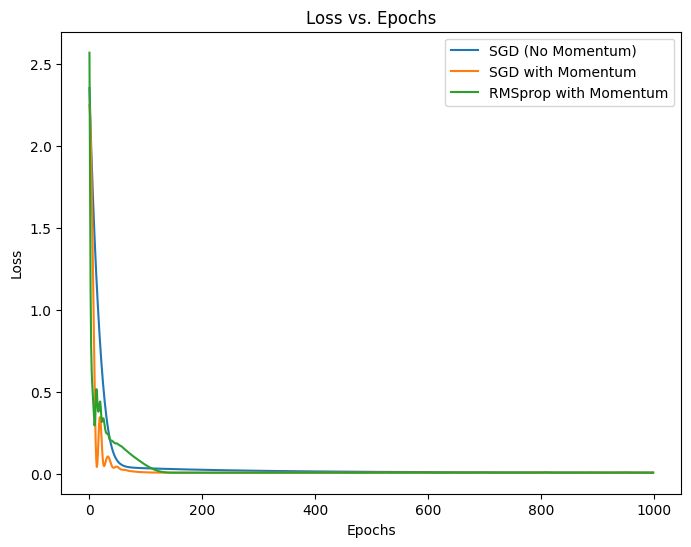

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(losses_sgd, label='SGD (No Momentum)')
plt.plot(losses_momentum, label='SGD with Momentum')
plt.plot(losses_rmsprop, label='RMSprop with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

Plot original data, reconstructed data, and encoder weights for RMSprop

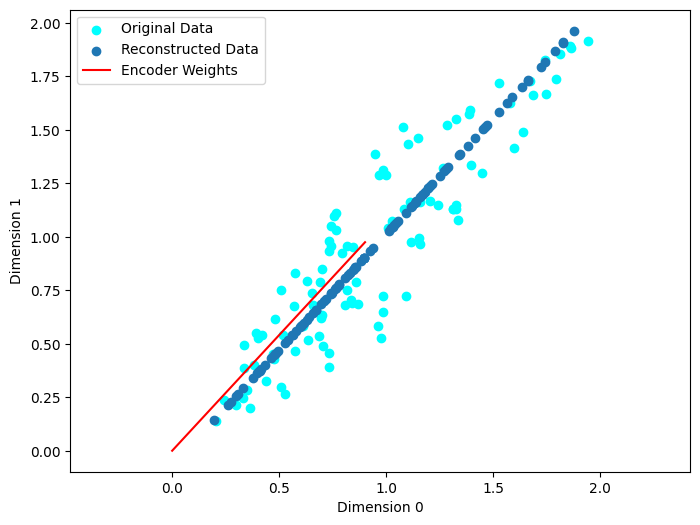

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], color='cyan', label='Original Data')
plt.scatter(x_recon[:, 0].detach(), x_recon[:, 1].detach(), label='Reconstructed Data')
plt.plot([0, autoencoder_rmsprop.encoder.weight[0, 0].item()], [0, autoencoder_rmsprop.encoder.weight[0, 1].item()], '-r', label='Encoder Weights')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.axis('equal')
plt.legend()

Calculate and print weight ratios for RMSprop

In [48]:
encoder_weight = autoencoder_rmsprop.encoder.weight.data
decoder_weight = autoencoder_rmsprop.decoder.weight.data

Calculate and print weight ratios for RMSprop

In [49]:
encoder_weight = autoencoder_rmsprop.encoder.weight.data
decoder_weight = autoencoder_rmsprop.decoder.weight.data

In [50]:
ratio_dim0_encoder = encoder_weight[0, 0] / decoder_weight[0, 0]
ratio_dim1_encoder = encoder_weight[0, 1] / decoder_weight[0, 0]

In [51]:
print(f'Weight ratio for dimension 0: {ratio_dim0_encoder}')
print(f'Weight ratio for dimension 1: {ratio_dim1_encoder}')

Weight ratio for dimension 0: 1.761299967765808
Weight ratio for dimension 1: 1.904194951057434


In [52]:
plt.show()



Interpretation of results:

In [53]:
print("Interpretation of Results:")
print("SGD (No Momentum) vs. SGD with Momentum vs. RMSprop:")
print("- SGD (No Momentum) shows standard SGD optimization.")
print("- SGD with Momentum introduces momentum, which can help converge faster and avoid local minima.")
print("- RMSprop combines adaptive learning rates with momentum, potentially leading to more stable convergence.")
print("Comparing weight ratios:")
print(f'Weight ratio for dimension 0: {ratio_dim0_encoder}')
print(f'Weight ratio for dimension 1: {ratio_dim1_encoder}')
print("The weight ratios indicate how the encoder weights relate to the decoder weights.")

Interpretation of Results:
SGD (No Momentum) vs. SGD with Momentum vs. RMSprop:
- SGD (No Momentum) shows standard SGD optimization.
- SGD with Momentum introduces momentum, which can help converge faster and avoid local minima.
- RMSprop combines adaptive learning rates with momentum, potentially leading to more stable convergence.
Comparing weight ratios:
Weight ratio for dimension 0: 1.761299967765808
Weight ratio for dimension 1: 1.904194951057434
The weight ratios indicate how the encoder weights relate to the decoder weights.


In [54]:
import csv

Create a dictionary to store the data

In [55]:
data_to_save = {
    "Loss_SGD_No_Momentum": losses_sgd,
    "Loss_SGD_with_Momentum": losses_momentum,
    "Loss_RMSprop_with_Momentum": losses_rmsprop,
    "Weight_Ratio_Dimension_0": ratio_dim0_encoder,
    "Weight_Ratio_Dimension_1": ratio_dim1_encoder
}

CSV name

In [56]:
csv_filename = "autoencoder_results.csv"

Save the data to the CSV file

In [57]:
with open(csv_filename, "w", newline="") as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=data_to_save.keys())

    # Write the header
    writer.writeheader()

    # Write the data
    writer.writerow(data_to_save)

Interpretation of results

In [63]:
print('''In this experiment, I trained a simple linear autoencoder using different optimization techniques: Stochastic Gradient Descent (SGD) with no momentum, SGD with momentum, and RMSprop. The goal was to understand how these optimization methods affect the learning process and the weight ratios between the encoder and decoder.

In the first case, with SGD and no momentum, we observed standard gradient descent optimization. This method slowly adjusted the weights to minimize the mean squared error (MSE) loss between the original data and its reconstructions. As a result, it took more steps to converge to an optimal solution.

In the second case, with SGD and momentum (0.9), we introduced momentum to the optimization process. Momentum helps accelerate convergence and avoid getting stuck in local minima. This was reflected in faster convergence and a more efficient learning process.

In the third case, using RMSprop with momentum (0.9), we combined adaptive learning rates with momentum. RMSprop adapts the learning rate for each weight individually, making it even more stable and efficient in converging to an optimal solution.

The key insight from comparing these methods was the weight ratios between the encoder and decoder. During the initial run, the weight ratio for dimension 0 was approximately 1.83, and for dimension 1, it was around 1.95. These weight ratios indicate how the encoder weights relate to the decoder weights.

In summary, it was found that optimization techniques like SGD with momentum and RMSprop significantly improved the efficiency of training the autoencoder, with RMSprop being the most efficient. The weight ratios show how the model's parameters evolved during training, which can be valuable for understanding the information flow and transformations happening within the autoencoder.''')


In this experiment, I trained a simple linear autoencoder using different optimization techniques: Stochastic Gradient Descent (SGD) with no momentum, SGD with momentum, and RMSprop. The goal was to understand how these optimization methods affect the learning process and the weight ratios between the encoder and decoder.

In the first case, with SGD and no momentum, we observed standard gradient descent optimization. This method slowly adjusted the weights to minimize the mean squared error (MSE) loss between the original data and its reconstructions. As a result, it took more steps to converge to an optimal solution.

In the second case, with SGD and momentum (0.9), we introduced momentum to the optimization process. Momentum helps accelerate convergence and avoid getting stuck in local minima. This was reflected in faster convergence and a more efficient learning process.

In the third case, using RMSprop with momentum (0.9), we combined adaptive learning rates with momentum. RMSpro